# Packages

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

import matplotlib.dates as mdates

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from datetime import datetime

# Importation des données

In [122]:
df = pd.read_csv("2025-08-MD.csv")

In [123]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,17819.01912,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,17978.97983,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


In [124]:
df = df.rename(columns = {"sasdate" : "date"})

We have 127 variables. We need to verify if the date est de 1959 to 2025 par ordre de mensualité. After that, let's check if our interested variables are on the dataset. 

# 1. Verify the frequence and the date of time series

In [125]:
# Drop the row of transform
df = df.iloc[1:].reset_index(drop=True)
print(df.head())

       date       RPI  W875RX1  DPCERA3M086SBEA    CMRMTSPLx      RETAILx  \
0  1/1/1959  2583.560   2426.0           15.188  276676.8154  17689.23968   
1  2/1/1959  2593.596   2434.8           15.346  278713.9773  17819.01912   
2  3/1/1959  2610.396   2452.7           15.491  277775.2539  17967.91336   
3  4/1/1959  2627.446   2470.0           15.435  283362.7075  17978.97983   
4  5/1/1959  2642.720   2486.4           15.622  285307.2201  18119.82573   

    INDPRO  IPFPNSS  IPFINAL  IPCONGD  ...  DNDGRG3M086SBEA  DSERRG3M086SBEA  \
0  21.9616  23.3868  22.2620  31.6664  ...           18.294           10.152   
1  22.3917  23.7024  22.4549  31.8987  ...           18.302           10.167   
2  22.7142  23.8459  22.5651  31.8987  ...           18.289           10.185   
3  23.1981  24.1903  22.8957  32.4019  ...           18.300           10.221   
4  23.5476  24.3911  23.1161  32.5567  ...           18.280           10.238   

   CES0600000008  CES2000000008  CES3000000008  UMCSENTx

In [126]:
# Let us make the date as index
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)
df = df.drop("date", axis=1)
df.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,17819.01912,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,17978.97983,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18119.82573,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [92]:
# Beginning and the end of the time series
print(df.index[0])
print(df.index[-1])

1959-01-01 00:00:00
2025-07-01 00:00:00


We observe that the dataset is vary 1959 to 2025. We normaly find the frequence of quaterly.

In [127]:
pd.infer_freq(df.index)

'MS'

The Monthly periods starting in December. 

# 2.Les variables à retenir

In [130]:
col_names = ["UNRATE", 
             # Unemployement
              "TB3MS", # 3-month treasury bill
                "RPI", # Industrial personal income
                "INDPRO", # Industrial production
                "DPCERA3M086SBEA", # Consumption
                "S&P 500", # S&P 500
                "BUSLOANS", # BUSLOANS
                "CPIAUCSL", # CPIAUCSL
                "OILPRICEx", # OILPRICEx
                "M2SL"] # M2SL

df = df[col_names]

In [131]:
print(df.columns.tolist())

['UNRATE', 'TB3MS', 'RPI', 'INDPRO', 'DPCERA3M086SBEA', 'S&P 500', 'BUSLOANS', 'CPIAUCSL', 'OILPRICEx', 'M2SL']


In [132]:
df.describe()

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,5.865957,4.361790,9666.669663,67.999611,57.273857,999.738411,872.206606,140.486603,33.444170,5574.285732
std,1.685733,3.110239,5142.560552,26.944540,31.187780,1284.170436,808.544347,85.004885,29.751963,5943.352438
min,3.400000,0.010000,2583.560000,21.961600,15.188000,53.730000,35.130400,28.970000,2.920000,286.600000
25%,4.600000,2.125000,5154.590000,45.053550,29.146000,101.200000,183.143400,54.400000,11.160000,987.300000
50%,5.600000,4.460000,8487.783000,62.919900,49.254000,412.500000,620.953300,139.400000,22.210000,3398.600000
75%,6.900000,5.820000,13788.714500,95.910400,84.407500,1331.220000,1244.471250,214.334000,51.480000,8116.150000
max,14.800000,16.300000,22850.332000,104.113700,123.458000,6296.500000,3034.312600,322.132000,133.930000,22115.400000


- UNRATE: Civilian unemployment rate, percent of labor force.
- TB3MS: 3-Month Treasury Bill Rate, percent per annum (yield).
- RPI: Real Personal Income, billions of chained 2012 U.S. dollars (SAAR).
- INDPRO: Industrial Production Index, index (2017 = 100).
- DPCERA3M086SBEA: Real Personal Consumption Expenditures, billions of chained 2012 U.S. dollars (SAAR).
- S&P 500: Standard & Poor’s 500 Index, index level (price index, no dividends).
- BUSLOANS: Commercial and Industrial Loans, billions of U.S. dollars.
- CPIAUCSL: Consumer Price Index for All Urban Consumers, index (1982–84 = 100).
- OILPRICEx: Crude Oil, West Texas Intermediate (WTI), U.S. dollars per barrel.
- M2SL: M2 Money Stock, billions of U.S. dollars.

# 3.NA

In [133]:
print(f"Number of missing values : {df.isna().sum().sum()}")

Number of missing values : 0


# 4. Exporter le df

In [134]:
df.to_csv("df.csv")

# 4.Plot Time Series

We cannot see the evolution of some Time Series.

In [99]:
# --- 2) Passer en format long
df_long = (
    df.reset_index()
      .melt(id_vars="date", var_name="series", value_name="value")
      .dropna(subset=["value"])
      .sort_values(["series", "date"])
)

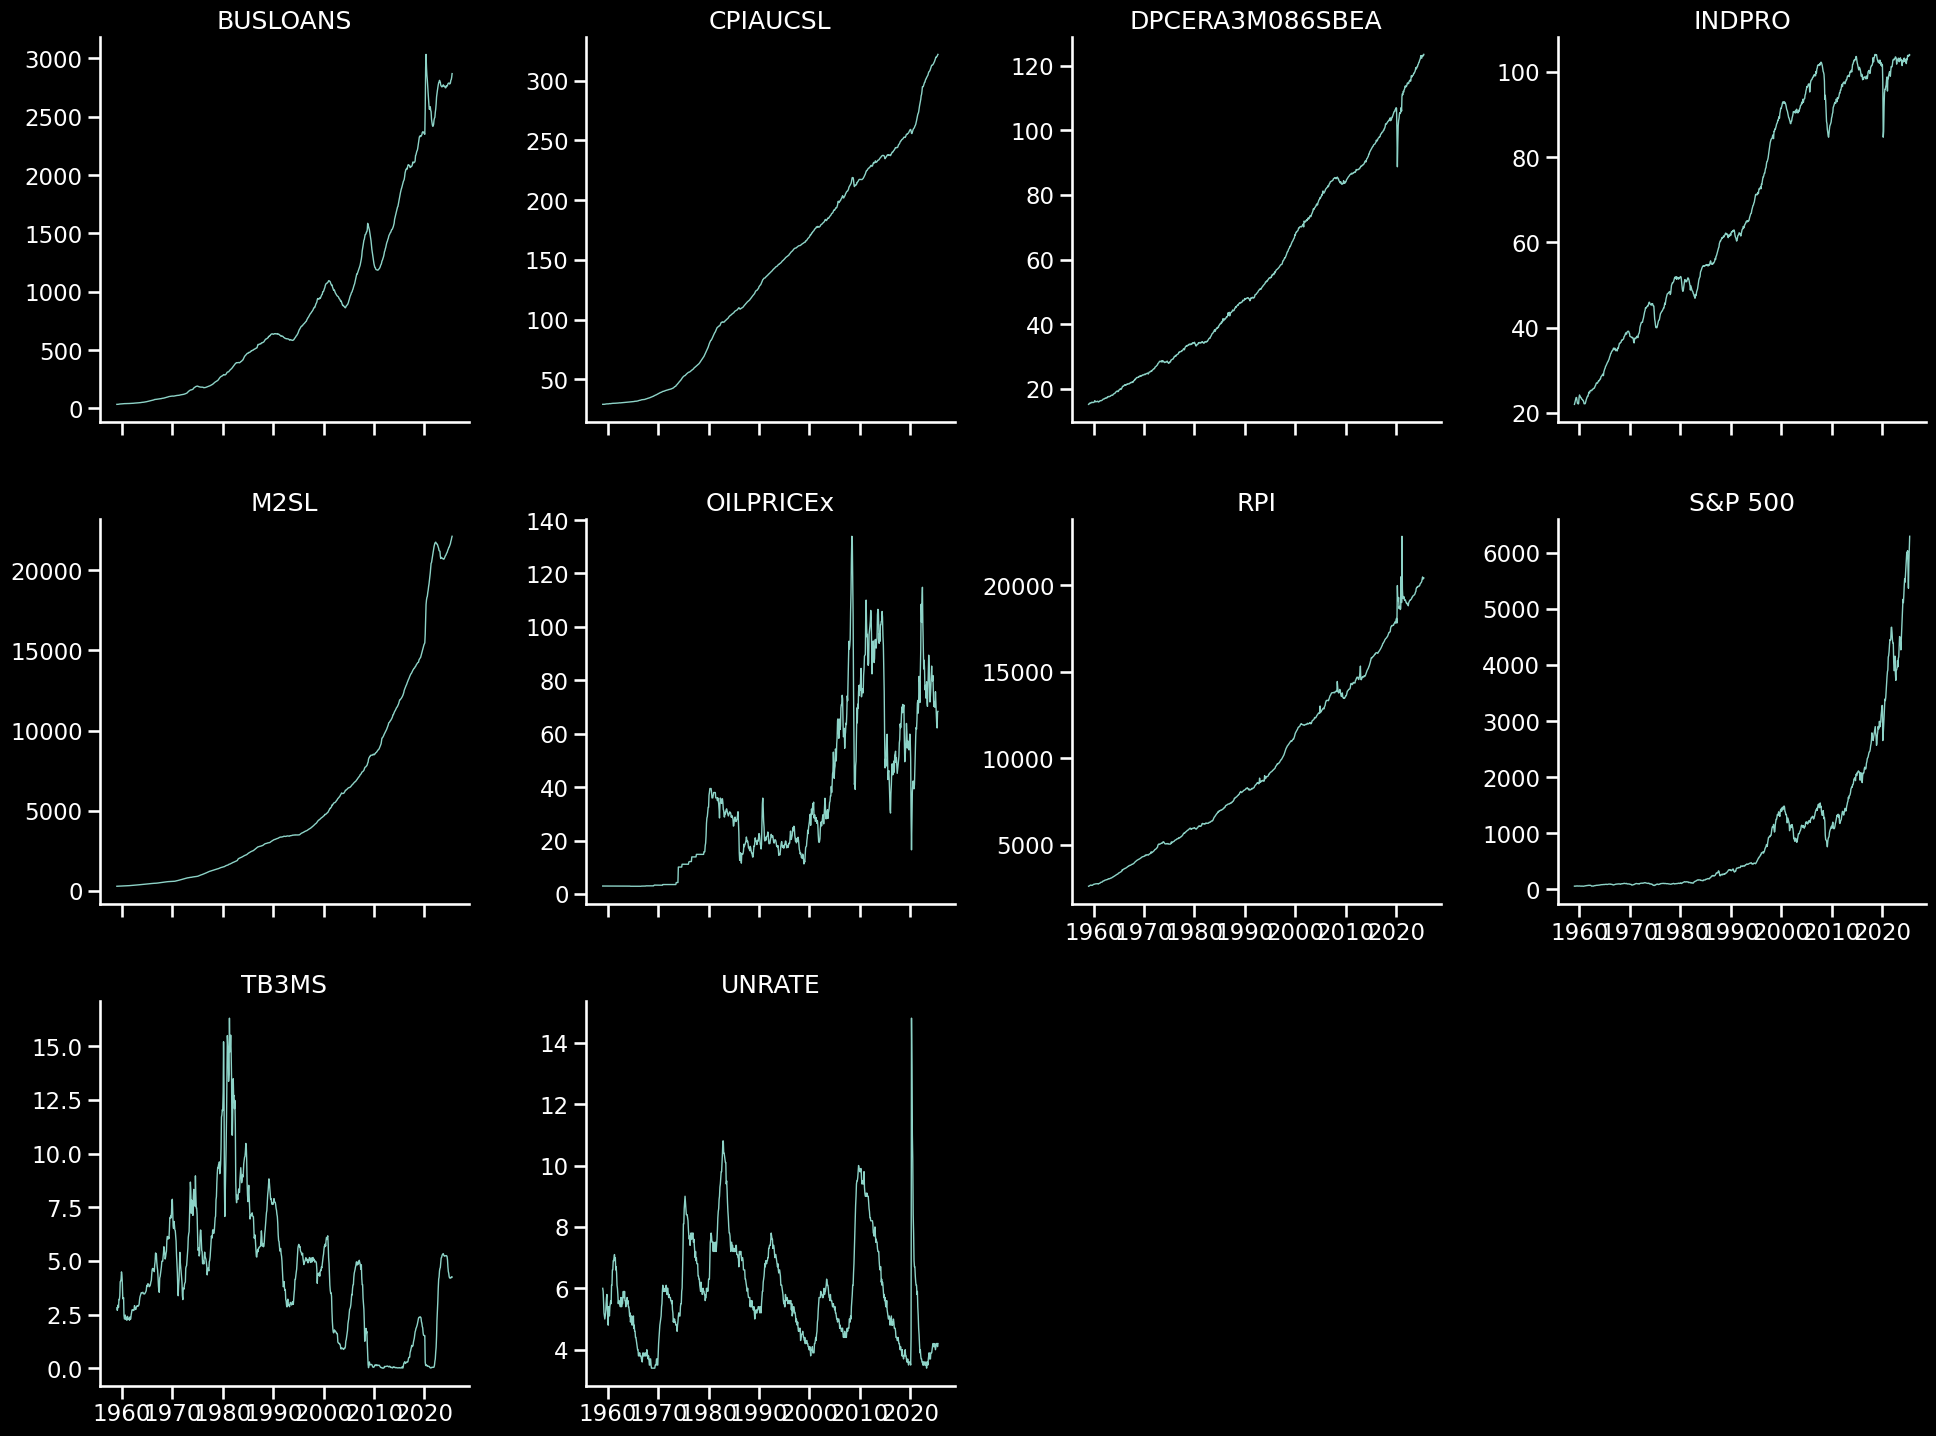

In [100]:
plt.style.use("dark_background")

g = sns.relplot(
    data=df_long,
    x="date", y="value",
    col="series", col_wrap=4,
    kind="line", linewidth=1,
    facet_kws=dict(sharey=False),
    hue=None, legend=False
)

g.set_axis_labels("", "")
g.set_titles("{col_name}")

for ax in g.axes.flat:
    ax.tick_params(axis="x", labelrotation=0, colors="white")
    ax.tick_params(axis="y", colors="white")
    ax.grid(False) 

plt.show()

Vu que le taux de chômage et le monthly treasure bill rate sont en pourcentage, ils sont très proche de l'état stationnaire (moyenne = 0  et variance stable). Le monthly treasure bill est un peu volatile. La variance commence à bouger sur l'OIL price tandis que la tendance à la hausse est la règle pour le reste. En clair, il faut analyser la stationnarité des données.

# 5.Stationnarité et son origine

In [101]:
# === 1. Test ADF (tau3) : racine unitaire ===
def test_adf_trend(series, autolag="AIC"):
    y = pd.Series(series).dropna()
    adf_res = adfuller(y, regression="ct", autolag=autolag)
    return {
        "adf_stat": adf_res[0],
        "adf_pval": adf_res[1],
        "usedlag": adf_res[2]
    }

In [102]:
# === 2. Estimation du Modèle 1 : Δy_t = c + β1 t + γ y_{t-1} + ... ===
def estimate_model1(series, lags):
    y = pd.Series(series).dropna()
    dy = y.diff()
    y_lag = y.shift(1)
    trend = np.arange(1, len(y) + 1)

    X = pd.DataFrame({
        "const": 1.0,
        "trend": trend,
        "y_lag": y_lag
    }, index=y.index)

    # Ajouter les retards de Δy
    for i in range(1, lags + 1):
        X[f"dy_lag{i}"] = dy.shift(i)

    df_model = pd.concat([dy, X], axis=1).dropna()
    dy_aligned = df_model.iloc[:, 0]
    X_aligned = df_model.iloc[:, 1:]

    ols_res = sm.OLS(dy_aligned, X_aligned).fit()
    return ols_res

In [103]:
# === 3. Test de Fisher (φ2) : H0 : c = β1 = γ = 0 ===
def test_fisher_phi2(ols_res):
    f_test = ols_res.f_test("const = 0, trend = 0, y_lag = 0")
    return {"phi2_F": float(f_test.fvalue), "phi2_pval": float(f_test.pvalue)}

In [104]:
ALPHA = 0.05
# === 4. Décision finale ===
def analyse_series(series, name, alpha=ALPHA):
    adf_out = test_adf_trend(series)
    ols_res = estimate_model1(series, adf_out["usedlag"])
    results = {
        "ADF stat (tau3)": adf_out["adf_stat"],
        "ADF p-value": adf_out["adf_pval"],
        "lags used": adf_out["usedlag"],
        "beta1": ols_res.params.get("trend", np.nan),
        "beta1 p-value": ols_res.pvalues.get("trend", np.nan)
    }

    # Cas 1 : pas de racine unitaire
    if adf_out["adf_pval"] < alpha:
        if results["beta1 p-value"] < alpha:
            results["Conclusion"] = "Stationnaire autour d’une tendance (TS)"
        else:
            results["Conclusion"] = "Stationnaire sans tendance significative"
        return results

    # Cas 2 : racine unitaire (non stationnaire)
    else:
        fisher_out = test_fisher_phi2(ols_res)
        results.update(fisher_out)
        if fisher_out["phi2_pval"] < alpha:
            results["Conclusion"] = "Δy_t est TS, donc y_t est I(1)"
        else:
            results["Conclusion"] = "y_t est une marche aléatoire pure (RW)"
        return results

In [105]:
# === 5. Application à tout un DataFrame ===
def analyse_dataframe(df):
    rows = {}
    for col in df.columns:
        rows[col] = analyse_series(df[col], col)
    return pd.DataFrame(rows).T

In [106]:
summary = analyse_dataframe(df)

print("\n=== Résumé des tests Modèle 1 ===")
print(summary[
    ["ADF stat (tau3)", "ADF p-value", "beta1", "beta1 p-value",
     "phi2_F", "phi2_pval", "Conclusion"]
])


=== Résumé des tests Modèle 1 ===
                ADF stat (tau3) ADF p-value     beta1 beta1 p-value  \
UNRATE                -3.432688    0.047171 -0.000029      0.663838   
TB3MS                 -2.967345    0.141441  -0.00012      0.067359   
RPI                   -0.664935    0.975353  0.191166      0.235926   
INDPRO                -2.322443    0.421578   0.00119      0.031186   
DPCERA3M086SBEA       -0.650409    0.976211  0.000701      0.210154   
S&P 500                 3.85047         1.0 -0.010981      0.498189   
BUSLOANS               -0.44882    0.985311  0.008658      0.144479   
CPIAUCSL              -1.818422    0.695808  0.001067      0.034211   
OILPRICEx              -3.42936    0.047587  0.002765      0.003882   
M2SL                   0.694723    0.997029  0.016436      0.224834   

                    phi2_F phi2_pval                                Conclusion  
UNRATE                 NaN       NaN  Stationnaire sans tendance significative  
TB3MS             2.9

## Analyse de la stationnarité : 
On comprend mieux maintenant nos données. Le taux de chômage est stationnaire à niveau. C'est normal puisque c'est un taux. Le reste ne sont pas stationnaires.
Presque toutes les séries sont stationnaires avec une différenciation 1. Seul le prix du baril du pétrol qui est stationnaire autour d'une tendance.

## Que faire ? 
- Notre objectif est de prédire et d'expliquer le taux de croissance du chômage avec celui des autres variables. Ainsi, nous allons donc 
- différencier le taux de chômage pour avoir une croissance. C'est aussi le cas pour TB3MS.
- Pour les autres variables, nous allons utiliser un log différence. 

# Stationnariser les taux

In [107]:
# ---------- Transformations ----------
def diff_simple(series, lags=1):
    """Δx_t = x_t - x_{t-l}"""
    return pd.Series(series).diff(lags)

# ---------- Test ADF (constante + tendance) ----------
def adf_test_ct(series, alpha=ALPHA):
    y = pd.Series(series).dropna()
    if len(y) < 20:
        return {"ok": False, "reason": "insufficient_data"}
    stat, pval, usedlag, nobs, crit, icbest = adfuller(y, regression="ct", autolag="AIC")
    return {"ok": True, "stat": stat, "pval": pval, "lags": usedlag, "stationary": (pval < alpha)}

In [108]:
ALPHA = 0.05   # seuil
LAGS_DIFF = 1 

# ---------- 1) Créer le DataFrame des taux transformés ----------
rate_cols = [c for c in ["UNRATE", "TB3MS"] if c in df.columns]
df_rates_trans = pd.DataFrame(index=df.index)

for col in rate_cols:
    df_rates_trans[col] = diff_simple(df[col], lags=LAGS_DIFF)

# Option : aligner sur les observations disponibles
df_rates_trans = df_rates_trans.dropna()

In [109]:
# ---------- 2) Résumé ADF pour les taux transformés ----------
rows = []
for col in df_rates_trans.columns:
    res = adf_test_ct(df_rates_trans[col], alpha=ALPHA)
    if res["ok"]:
        verdict = "Stationary" if res["stationary"] else "Non-stationary"
        rows.append({
            "series": col, "ADF stat": res["stat"], "p-value": res["pval"],
            "lags": res["lags"], "verdict": verdict
        })
    else:
        rows.append({"series": col, "ADF stat": np.nan, "p-value": np.nan,
                     "lags": np.nan, "verdict": res["reason"]})

summary_rates = pd.DataFrame(rows).set_index("series").sort_index()

print("\n=== Nouveau DataFrame des taux (différenciés) ===")
print(df_rates_trans.head())

print("\n=== Résumé ADF sur Δtaux ===")
print(summary_rates)


=== Nouveau DataFrame des taux (différenciés) ===
            UNRATE  TB3MS
date                     
1959-02-01    -0.1  -0.12
1959-03-01    -0.3   0.10
1959-04-01    -0.4   0.15
1959-05-01    -0.1  -0.11
1959-06-01    -0.1   0.37

=== Résumé ADF sur Δtaux ===
         ADF stat       p-value  lags     verdict
series                                           
TB3MS   -6.436463  2.542756e-07    19  Stationary
UNRATE -15.523665  1.370688e-22     3  Stationary


# Stationnariser les autres variables

In [110]:
ALPHA = 0.05
LAGS_DIFF = 1  # 1 = m/m ; mettre 12 pour y/y si besoin

# ---------- Transformations ----------
def diff_simple(series, lags=1):
    return pd.Series(series).diff(lags)

def log_diff(series, lags=1):
    s = pd.Series(series).astype(float)
    s = s.where(s > 0)
    return np.log(s).diff(lags)

def log_diff2(series, lags=1):
    s = pd.Series(series).astype(float)
    s = s.where(s > 0)
    return np.log(s).diff(lags).diff(lags)

# ---------- Test ADF (constante + tendance) ----------
def adf_test_ct(series, alpha=ALPHA):
    y = pd.Series(series).dropna()
    if len(y) < 20:
        return {"ok": False, "reason": "insufficient_data"}
    stat, pval, usedlag, nobs, crit, icbest = adfuller(y, regression="ct", autolag="AIC")
    return {"ok": True, "stat": stat, "pval": pval, "lags": usedlag, "stationary": (pval < alpha)}

# ---------- 1) Taux : Δ (ordre 1) ----------
rate_cols = [c for c in ["UNRATE", "TB3MS"] if c in df.columns]

df_rates_trans = pd.DataFrame(index=df.index)
summary_rates = []

for col in rate_cols:
    y_t = diff_simple(df[col], lags=LAGS_DIFF)     # Δ -> ordre 1
    df_rates_trans[col] = y_t
    res = adf_test_ct(y_t, alpha=ALPHA)
    if res["ok"]:
        summary_rates.append({
            "series": col, "method": "Δ", "order": 1,
            "ADF stat": res["stat"], "p-value": res["pval"], "lags": res["lags"],
            "verdict": "Stationary" if res["stationary"] else "Non-stationary"
        })
    else:
        summary_rates.append({"series": col, "method": "Δ", "order": 1,
                              "ADF stat": np.nan, "p-value": np.nan, "lags": np.nan,
                              "verdict": res["reason"]})

df_rates_trans = df_rates_trans.dropna()
summary_rates = pd.DataFrame(summary_rates).set_index("series").sort_index()

# ---------- 2) Niveaux positifs : Δlog (ordre 1) puis Δ²log (ordre 2 si besoin) ----------
log1_cols = ["RPI", "INDPRO", "DPCERA3M086SBEA", "S&P 500", "BUSLOANS", "CPIAUCSL", "OILPRICEx", "M2SL"]
log1_cols = [c for c in log1_cols if c in df.columns]

df_log_trans = pd.DataFrame(index=df.index)
summary_log = []

for col in log1_cols:
    # Essai Δlog (ordre 1)
    y1 = log_diff(df[col], lags=LAGS_DIFF)
    r1 = adf_test_ct(y1, alpha=ALPHA)

    if r1["ok"] and r1["stationary"]:
        df_log_trans[col] = y1
        summary_log.append({
            "series": col, "method": "Δlog", "order": 1,
            "ADF stat": r1["stat"], "p-value": r1["pval"], "lags": r1["lags"],
            "verdict": "Stationary"
        })
        continue

    # Sinon, essai Δ²log (ordre 2)
    y2 = log_diff2(df[col], lags=LAGS_DIFF)
    r2 = adf_test_ct(y2, alpha=ALPHA)

    df_log_trans[col] = y2  # on garde le plus fort niveau de diff tenté
    if r2["ok"]:
        summary_log.append({
            "series": col, "method": "Δ²log", "order": 2,
            "ADF stat": r2["stat"], "p-value": r2["pval"], "lags": r2["lags"],
            "verdict": "Stationary" if r2["stationary"] else "Non-stationary"
        })
    else:
        summary_log.append({
            "series": col, "method": "Δ²log", "order": 2,
            "ADF stat": np.nan, "p-value": np.nan, "lags": np.nan,
            "verdict": r2["reason"]
        })

df_log_trans = df_log_trans.dropna()
summary_log = pd.DataFrame(summary_log).set_index("series").sort_index()

In [111]:
# ---------- 3) Fusion : DataFrame global stationnaire + résumé ----------
df_stationary = pd.concat([df_rates_trans, df_log_trans], axis=1)
summary_all = pd.concat([summary_rates, summary_log]).sort_index()

In [112]:
summary_all

,method,order,ADF stat,p-value,lags,verdict
series,,,,,,
BUSLOANS,Δlog,1,-8.192679,2.562711e-11,4,Stationary
CPIAUCSL,Δ²log,2,-11.578271,1.963857e-18,13,Stationary
DPCERA3M086SBEA,Δlog,1,-15.522596,1.371625e-22,4,Stationary
INDPRO,Δlog,1,-7.548286,7.890372e-10,10,Stationary
M2SL,Δlog,1,-5.643157,1.193468e-05,8,Stationary
OILPRICEx,Δlog,1,-15.090976,1.978127e-22,3,Stationary
RPI,Δlog,1,-7.084971,9.068496e-09,19,Stationary
S&P 500,Δlog,1,-11.187454,9.903767e-18,5,Stationary
TB3MS,Δ,1,-6.436463,2.542756e-07,19,Stationary


# Présenter graphiquement les séries temporelles stationnaires

In [114]:
# 1) s'assurer que l'index est bien nommé/typé
df_stationary = df_stationary.copy()
df_stationary.index.name = "date"
df_stationary.index = pd.to_datetime(df_stationary.index)

# 2) passage en format long
df_long = (
    df_stationary
      .reset_index()                           # sasdate -> colonne
      .melt(id_vars="date",
            var_name="series",
            value_name="value")
      .dropna(subset=["value"])
      .sort_values(["series", "date"])
      .reset_index(drop=True)
)

# 3) ajouter method/order si tu as déjà 'summary_all'
if "summary_all" in globals():
    meta = summary_all[["method", "order"]].reset_index()  # 'series' en index dans summary_all
    df_long = df_long.merge(meta, on="series", how="left")

print(df_long.head())

        date    series     value method  order
0 1959-03-01  BUSLOANS -0.002550   Δlog      1
1 1959-04-01  BUSLOANS  0.012101   Δlog      1
2 1959-05-01  BUSLOANS  0.020826   Δlog      1
3 1959-06-01  BUSLOANS  0.022711   Δlog      1
4 1959-07-01  BUSLOANS  0.014013   Δlog      1


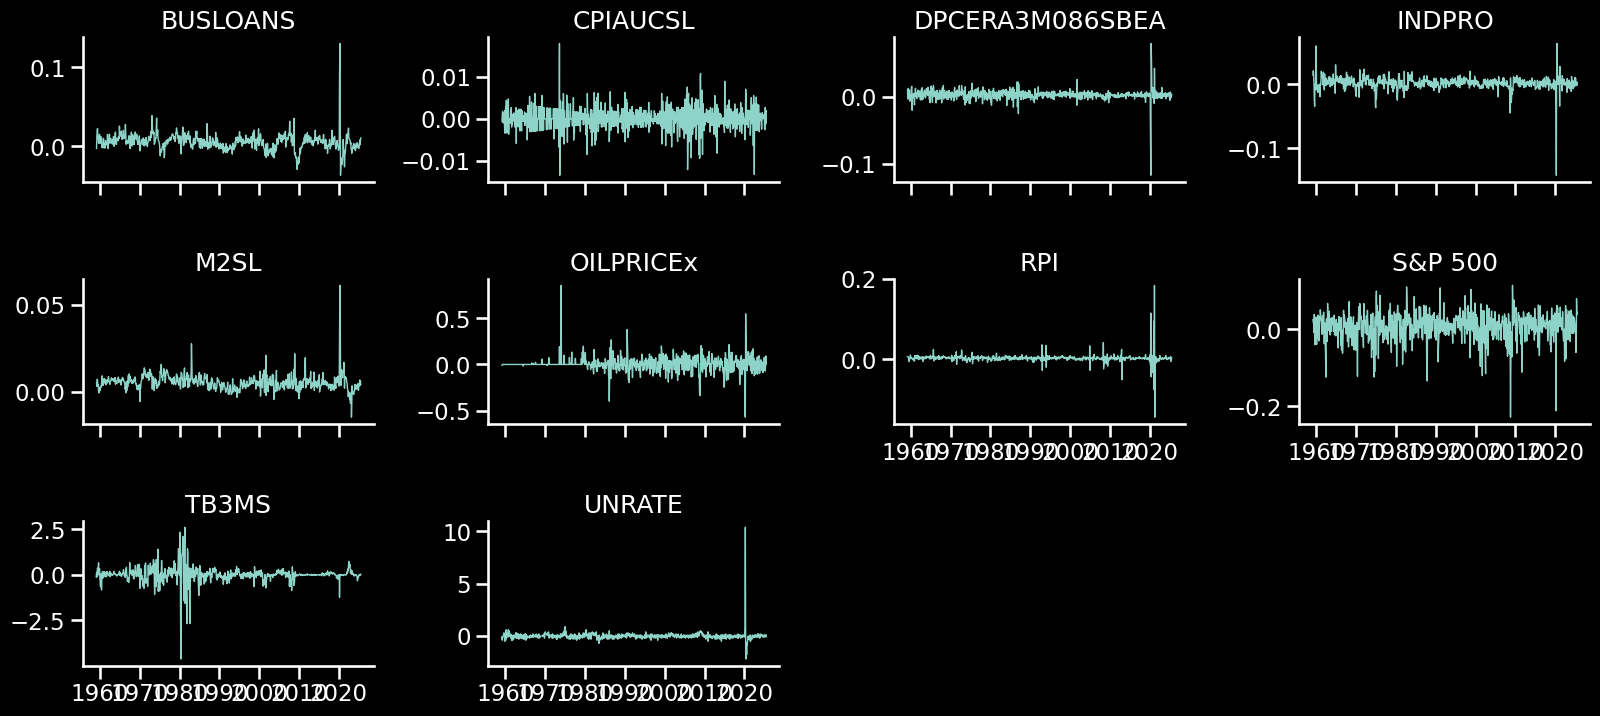

In [115]:
# s'assurer de l'ordre et du type de date
df_long = df_long.sort_values(["series", "date"]).copy()
df_long["date"] = pd.to_datetime(df_long["date"])

plt.style.use("dark_background")
sns.set_context("talk")

g = sns.relplot(
    data=df_long,
    x="date", y="value",
    col="series", col_wrap=4,
    kind="line", linewidth=1,
    facet_kws=dict(sharey=False),
    hue=None, legend=False,
    height=2.6, aspect=1.6
)

g.set_axis_labels("", "")
g.set_titles("{col_name}")

# Formatage des dates pour plus de lisibilité en fond sombre
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

for ax in g.axes.flat:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.tick_params(axis="x", labelrotation=0, colors="white")
    ax.tick_params(axis="y", colors="white")
    ax.grid(False)

plt.show()

# Exporter la série stationnaire

In [116]:
df_stationary.to_csv("df_stationary.csv")

Comme nous pouvons voir, la moyenne des séries temporelles tourne maintenant autour de 0. Les écarts-types se rapprochent aussi de 0 mais ils ne sont pas encore normalisés.

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
sasdate,,,,,,,,,,
2020-06-01,-5.130071,0.068617,-0.283437,6.247782,6.557164,1.547948,-4.156928,2.110281,3.49522,2.302706


In [34]:
df_stationary_normalized[df_stationary_normalized["TB3MS"] == df_stationary_normalized["TB3MS"].min()]

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
sasdate,,,,,,,,,,
1980-05-01,1.405447,-11.304292,-0.485942,-2.699253,-0.942501,1.078722,-1.478282,-0.037398,-0.047532,0.273716


In [35]:
print(df_stationary_normalized[df_stationary_normalized["RPI"] == df_stationary_normalized["RPI"].min()])
print(df_stationary_normalized[df_stationary_normalized["RPI"] == df_stationary_normalized["RPI"].max()])

              UNRATE     TB3MS        RPI    INDPRO  DPCERA3M086SBEA  \
sasdate                                                                
2021-04-01  0.004979 -0.029214 -12.546098 -0.050358         0.577825   

             S&P 500  BUSLOANS  CPIAUCSL  OILPRICEx      M2SL  
sasdate                                                        
2021-04-01  1.432587 -1.696012   0.68683  -0.166163  2.508236  
              UNRATE     TB3MS        RPI    INDPRO  DPCERA3M086SBEA  \
sasdate                                                                
2021-03-01 -0.228433 -0.029214  15.480372  2.607891         4.975053   

             S&P 500  BUSLOANS  CPIAUCSL  OILPRICEx      M2SL  
sasdate                                                        
2021-03-01  0.028436 -0.488413  0.467022    0.60658  1.322809  


In [36]:
print(df_stationary_normalized[df_stationary_normalized["INDPRO"] == df_stationary_normalized["INDPRO"].min()])

               UNRATE     TB3MS       RPI     INDPRO  DPCERA3M086SBEA  \
sasdate                                                                 
2020-04-01  24.279758 -0.371625  9.595534 -14.539368        -15.02817   

             S&P 500   BUSLOANS  CPIAUCSL  OILPRICEx       M2SL  
sasdate                                                          
2020-04-01  0.963469  12.340091 -1.258165  -6.900442  12.216348  


In [37]:
print(df_stationary_normalized[df_stationary_normalized["DPCERA3M086SBEA"] == df_stationary_normalized["DPCERA3M086SBEA"].min()])

               UNRATE     TB3MS       RPI     INDPRO  DPCERA3M086SBEA  \
sasdate                                                                 
2020-04-01  24.279758 -0.371625  9.595534 -14.539368        -15.02817   

             S&P 500   BUSLOANS  CPIAUCSL  OILPRICEx       M2SL  
sasdate                                                          
2020-04-01  0.963469  12.340091 -1.258165  -6.900442  12.216348  


In [38]:
print(df_stationary_normalized.loc[
    df_stationary_normalized["BUSLOANS"].nlargest(2).index
])

               UNRATE     TB3MS       RPI     INDPRO  DPCERA3M086SBEA  \
sasdate                                                                 
2020-04-01  24.279758 -0.371625  9.595534 -14.539368       -15.028170   
2020-03-01   2.105681 -3.013074 -1.484363  -4.314867        -8.958179   

             S&P 500   BUSLOANS  CPIAUCSL  OILPRICEx       M2SL  
sasdate                                                          
2020-04-01  0.963469  12.340091 -1.258165  -6.900442  12.216348  
2020-03-01 -6.063662   8.094424 -1.847472  -6.660751   6.128186  


In [39]:
print(df_stationary_normalized[df_stationary_normalized["CPIAUCSL"] == df_stationary_normalized["CPIAUCSL"].max()])

              UNRATE     TB3MS       RPI    INDPRO  DPCERA3M086SBEA   S&P 500  \
sasdate                                                                         
1973-08-01  0.004979  1.609463 -0.474937 -0.334028        -1.895721 -0.697382   

            BUSLOANS  CPIAUCSL  OILPRICEx      M2SL  
sasdate                                              
1973-08-01  1.181742  6.603959   2.258512 -0.590573  


In [40]:
df["CPIAUCSL"].loc["1974"]

sasdate
1974-01-01    46.8
1974-02-01    47.3
1974-03-01    47.8
1974-04-01    48.1
1974-05-01    48.6
1974-06-01    49.0
1974-07-01    49.3
1974-08-01    49.9
1974-09-01    50.6
1974-10-01    51.0
1974-11-01    51.5
1974-12-01    51.9
Name: CPIAUCSL, dtype: float64

In [41]:
print(df_stationary_normalized[df_stationary_normalized["OILPRICEx"] == df_stationary_normalized["OILPRICEx"].min()])
print(df_stationary_normalized[df_stationary_normalized["OILPRICEx"] == df_stationary_normalized["OILPRICEx"].max()])

               UNRATE     TB3MS       RPI     INDPRO  DPCERA3M086SBEA  \
sasdate                                                                 
2020-04-01  24.279758 -0.371625  9.595534 -14.539368        -15.02817   

             S&P 500   BUSLOANS  CPIAUCSL  OILPRICEx       M2SL  
sasdate                                                          
2020-04-01  0.963469  12.340091 -1.258165  -6.900442  12.216348  
              UNRATE     TB3MS       RPI    INDPRO  DPCERA3M086SBEA   S&P 500  \
sasdate                                                                         
1974-01-01  0.471801  0.777895 -0.952292 -0.866378        -0.398794  0.223204   

            BUSLOANS  CPIAUCSL  OILPRICEx      M2SL  
sasdate                                              
1974-01-01  0.557974  0.758803  10.236653 -0.120401  


In [42]:
print(df_stationary_normalized[df_stationary_normalized["S&P 500"] == df_stationary_normalized["S&P 500"].min()])
print(df_stationary_normalized[df_stationary_normalized["S&P 500"] == df_stationary_normalized["S&P 500"].max()])

              UNRATE     TB3MS       RPI    INDPRO  DPCERA3M086SBEA   S&P 500  \
sasdate                                                                         
2008-10-01  0.938624 -1.129818  0.355445  0.817635        -0.521597 -6.523209   

            BUSLOANS  CPIAUCSL  OILPRICEx      M2SL  
sasdate                                              
2008-10-01  2.968649 -3.496094  -3.716642  1.638858  
              UNRATE     TB3MS       RPI    INDPRO  DPCERA3M086SBEA   S&P 500  \
sasdate                                                                         
2009-04-01  0.705213 -0.127046 -0.028235 -0.988775        -0.514733  2.999713   

            BUSLOANS  CPIAUCSL  OILPRICEx      M2SL  
sasdate                                              
2009-04-01 -1.863408  0.733007   0.399135 -1.068154  


In [43]:
print(df_stationary_normalized.loc[
    df_stationary_normalized["M2SL"].nlargest(3).index
])

               UNRATE     TB3MS       RPI     INDPRO  DPCERA3M086SBEA  \
sasdate                                                                 
2020-04-01  24.279758 -0.371625  9.595534 -14.539368       -15.028170   
2020-05-01  -3.729603 -0.029214 -3.967712   1.380456         9.596907   
2020-03-01   2.105681 -3.013074 -1.484363  -4.314867        -8.958179   

             S&P 500   BUSLOANS  CPIAUCSL  OILPRICEx       M2SL  
sasdate                                                          
2020-04-01  0.963469  12.340091 -1.258165  -6.900442  12.216348  
2020-05-01  1.382199   3.223455  2.595778   6.533927   9.438126  
2020-03-01 -6.063662   8.094424 -1.847472  -6.660751   6.128186  


Les valeurs extrêmes correspondent aux chocs aux économies de l'USA. Il s'agit de la première crise pétrolière de 1973 à 1974, la deuxième crise pétrolière de 1980, et la crise économique suite au Coronavirus au début de 2020. Essayons d'analyser graphiquement pour analyser l'évolution des choses.

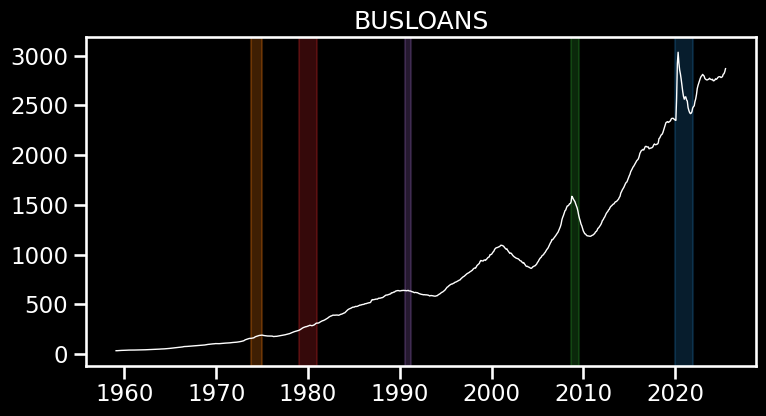

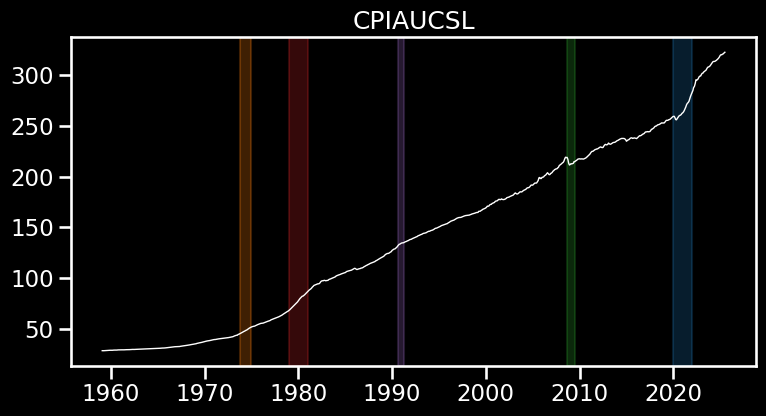

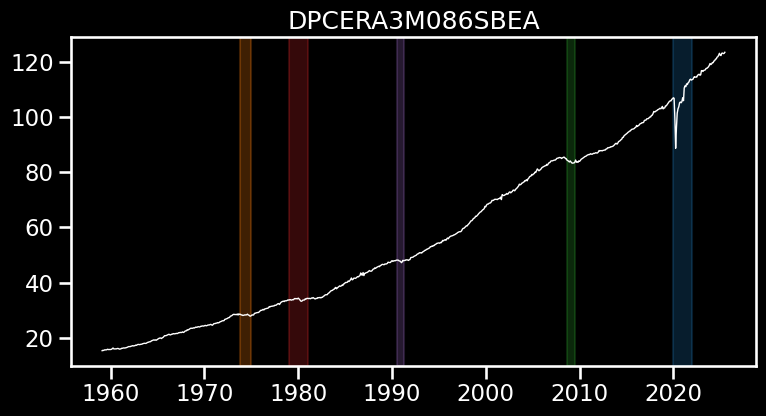

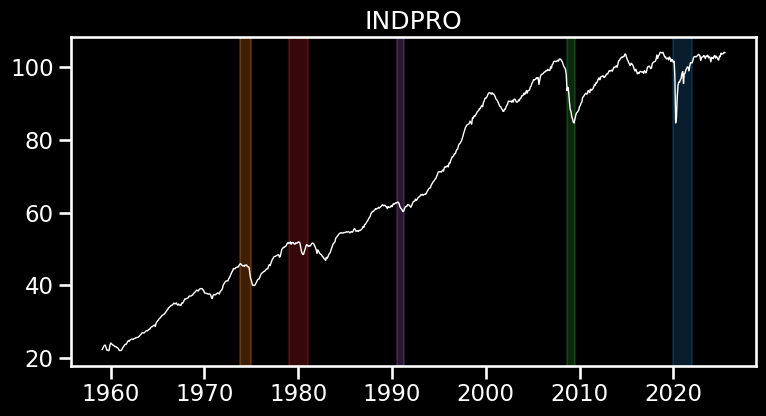

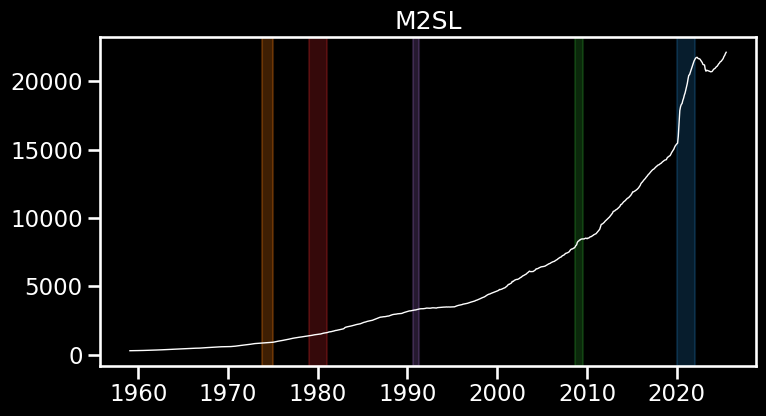

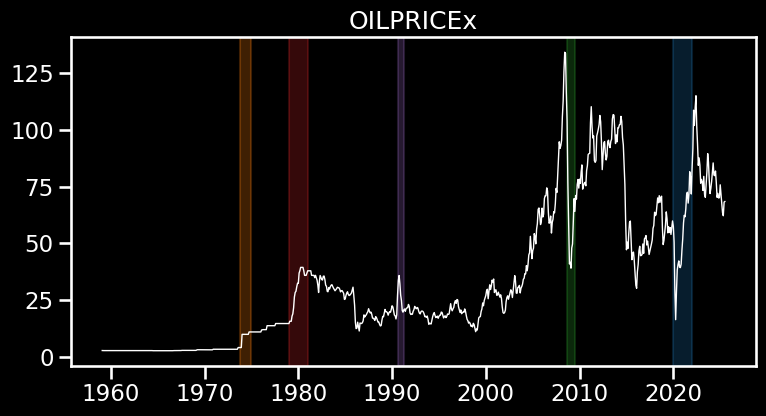

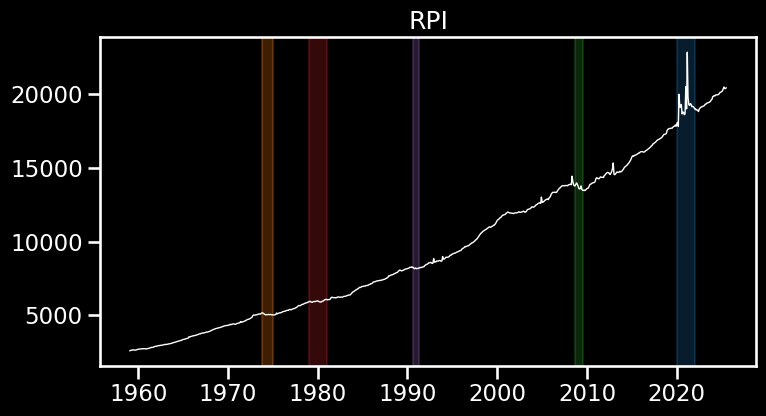

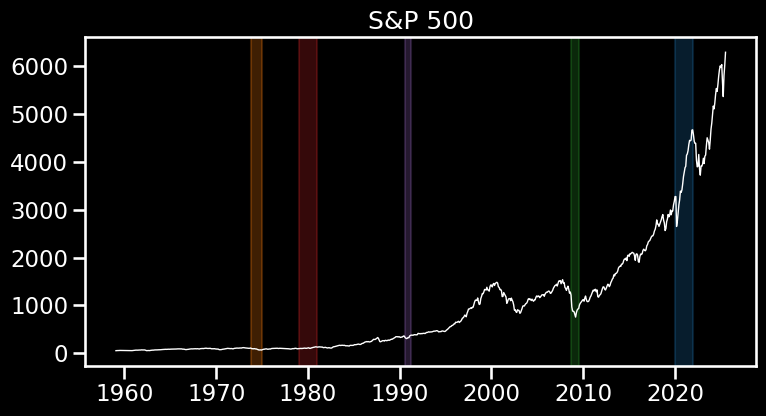

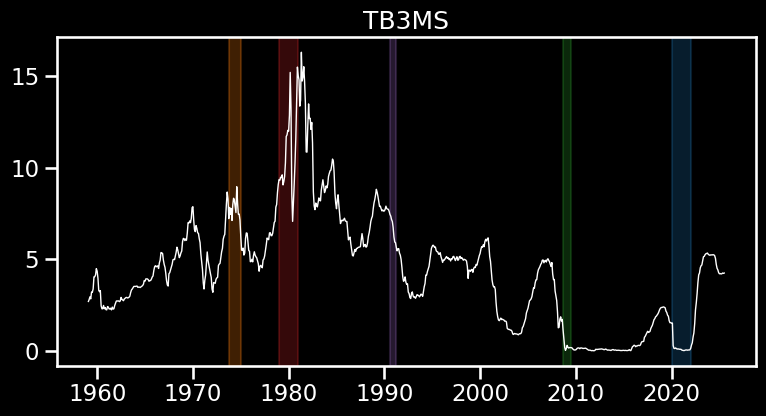

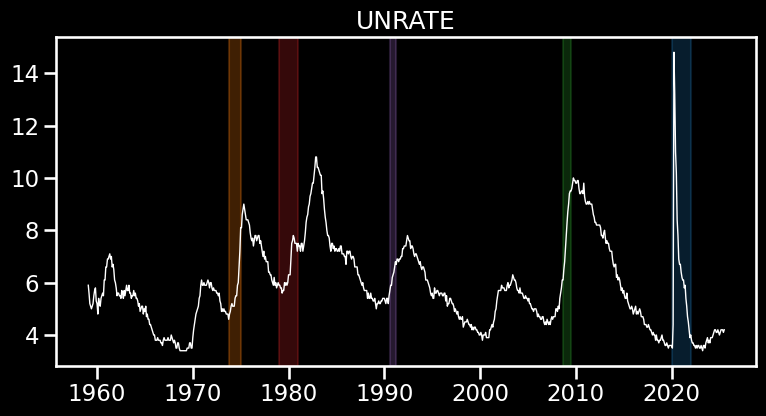

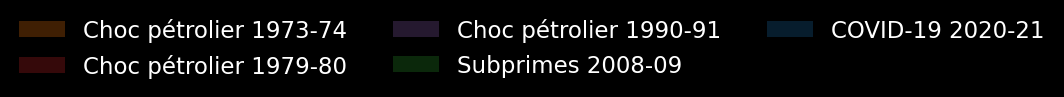

In [44]:
plt.style.use("dark_background")

# Format long
df_long = (
    df.reset_index()
      .melt(id_vars="sasdate", var_name="series", value_name="value")
      .dropna(subset=["value"])
      .sort_values(["series", "sasdate"])
)

df_long["sasdate"] = pd.to_datetime(df_long["sasdate"])

# Fenêtres des crises
crises = {
    "Choc pétrolier 1973-74": (datetime(1973,10,1), datetime(1974,12,31)),
    "Choc pétrolier 1979-80": (datetime(1979,1,1),  datetime(1980,12,31)),
    "Choc pétrolier 1990-91": (datetime(1990,8,1),  datetime(1991,3,31)),
    "Subprimes 2008-09":      (datetime(2008,9,1),  datetime(2009,6,30)),
    "COVID-19 2020-21":       (datetime(2020,1,1),  datetime(2021,12,31)),
}

# Couleurs
couleurs = {
    "Choc pétrolier 1973-74": "tab:orange",
    "Choc pétrolier 1979-80": "tab:red",
    "Choc pétrolier 1990-91": "tab:purple",
    "Subprimes 2008-09":      "tab:green",
    "COVID-19 2020-21":       "tab:blue",
}

# Créer une figure par série
for series_name, d in df_long.groupby("series"):
    fig, ax = plt.subplots(figsize=(8, 4.5))
    ax.plot(d["sasdate"], d["value"], linewidth=1, color="white")

    # Zones de crise (sans label, pour éviter répétition)
    for label, (d0, d1) in crises.items():
        ax.axvspan(d0, d1, alpha=0.25, color=couleurs[label])

    ax.set_title(str(series_name))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(False)

    plt.tight_layout()

# --- Une seule légende globale à la fin ---
fig_legend, ax_leg = plt.subplots(figsize=(6, 1))
for label, color in couleurs.items():
    ax_leg.bar(0, 0, color=color, alpha=0.25, label=label)  # bar fantôme juste pour la légende
ax_leg.legend(ncol=3, frameon=False, loc="center")
ax_leg.axis("off")

plt.show()

In [45]:
df["INDPRO"].loc["2020"]

sasdate
2020-01-01    101.3372
2020-02-01    101.6718
2020-03-01     97.6060
2020-04-01     84.6812
2020-05-01     86.0108
2020-06-01     91.6745
2020-07-01     95.0037
2020-08-01     95.9294
2020-09-01     95.8914
2020-10-01     96.5256
2020-11-01     96.9529
2020-12-01     98.2039
Name: INDPRO, dtype: float64

In [46]:
df["CPIAUCSL"].loc["2008"]

sasdate
2008-01-01    212.174
2008-02-01    212.687
2008-03-01    213.448
2008-04-01    213.942
2008-05-01    215.208
2008-06-01    217.463
2008-07-01    219.016
2008-08-01    218.690
2008-09-01    218.877
2008-10-01    216.995
2008-11-01    213.153
2008-12-01    211.398
Name: CPIAUCSL, dtype: float64

En Septembre 2008, il y a eu la faillite de Lehman Brothers. Ce qui a fait éclater la crise. Essayeons de voir l'évolution de la consommation durant ce moment. 

In [47]:
# Taux de croissance de la production industrielle durant le Covid-19
consommation_subprimes = df["CPIAUCSL"].loc["2008-09":"2009-01"]

# taux de croissance moyen (CAGR)
v0 = consommation_subprimes.iloc[0] 
v1 = consommation_subprimes.iloc[-1]  

n = len(consommation_subprimes) - 1

cagr = (v1 / v0) ** (1/n) - 1

print(f"Taux de croissance mensuel moyen entre 2008-09 et 2009-01 : {cagr:.2%}")


Taux de croissance mensuel moyen entre 2008-09 et 2009-01 : -0.80%


In [48]:
# Taux de croissance de la production industrielle durant le Covid-19
indpro_2020 = df["INDPRO"].loc["2020"]

# valeurs initiale et finale
v0 = indpro_2020.iloc[1]
v1 = indpro_2020.iloc[3]

# nombre de périodes (mois ici)
n = 2

# taux de croissance moyen (CAGR)
cagr = (v1 / v0) ** (1/n) - 1
print(f"Taux de croissance moyen mensuel entre février 2020 à Avril 2020 : {cagr:.2%}")


Taux de croissance moyen mensuel entre février 2020 à Avril 2020 : -8.74%


La consommation suit-t-elle l'évolution de l'emploi et de la production durant la période de crise? 

In [49]:
# Définir la fenêtre de la crise COVID (4 mois : janv → avr 2020)
start, end = datetime(2020,1,1), datetime(2020,4,30)

# Fonction CAGR (taux de croissance moyen)
def cagr(v0, v1, n):
    if v0 <= 0 or v1 <= 0 or n <= 0:
        return np.nan
    return (v1 / v0) ** (1/n) - 1

results = []

# Boucler sur chaque variable
for series_name, d in df_long.groupby("series"):
    d = d.set_index("sasdate").sort_index()
    sub = d.loc[start:end]

    if len(sub) >= 2:
        v0 = sub.iloc[0]["value"]
        v1 = sub.iloc[-1]["value"]
        n  = len(sub) - 1   # nombre de pas (mois)
        taux = cagr(v0, v1, n)
    else:
        taux = np.nan

    results.append([series_name, taux])

# Construire le tableau final
tableau_covid = pd.DataFrame(results, columns=["Variable", "Taux_croissance_moyen"])
tableau_covid["Taux_croissance_moyen"] = tableau_covid["Taux_croissance_moyen"] * 100
tableau_covid

,Variable,Taux_croissance_moyen
0,BUSLOANS,7.443562
1,CPIAUCSL,-0.399727
2,DPCERA3M086SBEA,-6.058246
3,INDPRO,-5.809732
4,M2SL,3.323936
5,OILPRICEx,-33.982404
6,RPI,3.543401
7,S&P 500,-5.551508
8,TB3MS,-54.839215
9,UNRATE,60.196518


In [50]:
# Définir la fenêtre de la crise 1973 (oct 1973 → mars 1974)
start73, end73 = datetime(1973,10,1), datetime(1974,3,31)

results_73 = []

for series_name, d in df_long.groupby("series"):
    d = d.set_index("sasdate").sort_index()
    sub = d.loc[start73:end73]

    if len(sub) >= 2:
        v0 = sub.iloc[0]["value"]
        v1 = sub.iloc[-1]["value"]
        n  = len(sub) - 1   # nombre de pas (mois)
        taux = cagr(v0, v1, n)
    else:
        taux = np.nan

    results_73.append([series_name, taux])

# Construire le tableau final
tableau_1973 = pd.DataFrame(results_73, columns=["Variable", "Taux_croissance_moyen"])
tableau_1973["Taux_croissance_moyen"] = tableau_1973["Taux_croissance_moyen"] * 100

tableau_1973

,Variable,Taux_croissance_moyen
0,BUSLOANS,1.183854
1,CPIAUCSL,0.946813
2,DPCERA3M086SBEA,-0.229858
3,INDPRO,-0.160704
4,M2SL,0.644383
5,OILPRICEx,18.591832
6,RPI,-0.429419
7,S&P 500,-2.360176
8,TB3MS,1.970647
9,UNRATE,2.085126


In [51]:
df["OILPRICEx"].loc["1989"]

sasdate
1989-01-01    17.983
1989-02-01    17.826
1989-03-01    19.445
1989-04-01    21.040
1989-05-01    20.032
1989-06-01    20.005
1989-07-01    19.644
1989-08-01    18.522
1989-09-01    19.594
1989-10-01    20.091
1989-11-01    19.820
1989-12-01    21.088
Name: OILPRICEx, dtype: float64

In [52]:
# Extraire la série pétrole en 1979
oil_1979 = df["OILPRICEx"].loc["1979-01":"1979-12"]

# Valeurs initiale et finale
v0 = oil_1979.iloc[0]    # prix en janv. 1979
v1 = oil_1979.iloc[-1]   # prix en déc. 1979

# Variation totale en %
taux_total = (v1 / v0 - 1) * 100

# Taux de croissance mensuel moyen (CAGR)
n = len(oil_1979) - 1   # nombre de mois
cagr = ((v1 / v0) ** (1/n) - 1) * 100

print(f"Croissance totale du prix du baril en 1979 : {taux_total:.2f}%")
print(f"Taux de croissance mensuel moyen en 1979 : {cagr:.2f}%")

Croissance totale du prix du baril en 1979 : 118.86%
Taux de croissance mensuel moyen en 1979 : 7.38%


In [53]:
# Indice boursier par rapport à ces fluctuations
df["S&P 500"].loc["1974"]

sasdate
1974-01-01    96.11
1974-02-01    93.45
1974-03-01    97.44
1974-04-01    92.46
1974-05-01    89.67
1974-06-01    89.79
1974-07-01    79.31
1974-08-01    76.03
1974-09-01    68.12
1974-10-01    69.44
1974-11-01    71.74
1974-12-01    67.07
Name: S&P 500, dtype: float64

In [54]:
df["S&P 500"].loc["2008"]

sasdate
2008-01-01    1378.76
2008-02-01    1354.87
2008-03-01    1316.94
2008-04-01    1370.47
2008-05-01    1403.22
2008-06-01    1341.25
2008-07-01    1257.33
2008-08-01    1281.47
2008-09-01    1216.95
2008-10-01     968.80
2008-11-01     883.04
2008-12-01     877.56
Name: S&P 500, dtype: float64

In [55]:
# Extraire l'indice S&P 500 sur sept et oct 2008
sp = df["S&P 500"].loc["2008-09":"2008-10"]

# Valeur de début et fin
v0 = sp.iloc[0]   # septembre 2008
v1 = sp.iloc[-1]  # octobre 2008

# Taux de croissance total
growth = (v1 / v0 - 1) * 100

print(f"Variation du S&P 500 entre sept. 2008 et oct. 2008 : {growth:.2f}%")

Variation du S&P 500 entre sept. 2008 et oct. 2008 : -20.39%


In [56]:
df["S&P 500"].loc["2008"]

sasdate
2008-01-01    1378.76
2008-02-01    1354.87
2008-03-01    1316.94
2008-04-01    1370.47
2008-05-01    1403.22
2008-06-01    1341.25
2008-07-01    1257.33
2008-08-01    1281.47
2008-09-01    1216.95
2008-10-01     968.80
2008-11-01     883.04
2008-12-01     877.56
Name: S&P 500, dtype: float64

In [57]:
df["S&P 500"].loc["2020"]

sasdate
2020-01-01    3278.20
2020-02-01    3277.31
2020-03-01    2652.39
2020-04-01    2761.98
2020-05-01    2919.62
2020-06-01    3104.66
2020-07-01    3207.62
2020-08-01    3391.71
2020-09-01    3365.52
2020-10-01    3418.70
2020-11-01    3548.99
2020-12-01    3695.31
Name: S&P 500, dtype: float64

In [58]:
df["RPI"].loc["2009"]

sasdate
2009-01-01    13762.240
2009-02-01    13603.699
2009-03-01    13570.847
2009-04-01    13601.477
2009-05-01    13779.884
2009-06-01    13544.781
2009-07-01    13493.206
2009-08-01    13468.487
2009-09-01    13502.606
2009-10-01    13460.827
2009-11-01    13494.222
2009-12-01    13551.644
Name: RPI, dtype: float64

In [59]:
# Extraire la série RPI en 2009
rpi_2009 = df["RPI"].loc["2009-01":"2009-12"]

# Valeur initiale et finale
v0 = rpi_2009.iloc[0]   # janvier 2009
v1 = rpi_2009.iloc[-1]  # décembre 2009

# Nombre de périodes (mois)
n = len(rpi_2009) - 1

# Taux de croissance moyen (CAGR mensuel)
cagr = (v1 / v0) ** (1/n) - 1

print(f"Croissance mensuelle moyenne du RPI en 2009 : {cagr:.2%}")

Croissance mensuelle moyenne du RPI en 2009 : -0.14%


Il y avait eu plus de chômage au mois de Juin 2020. Ce qui est normal puisque le premier cas de Coronavirus aux Etats-Unis a été le 20 janvier 2020. Il y a eu chômage car l’économie a subi un arrêt brutal, aux USA les entreprises licencient très vite pour s’adapter. Mais une partie du chômage a été temporaire. beaucoup de personnes licenciées en 2020 ont retrouvé un emploi en 2021, une fois la réouverture et la relance enclenchées.

L'augmentation du chômage a impacté négativement parlant la production industrielle. Elle a diminué de 8,7% en en Février jusqu'au mois d'Avril 2020. Cette relation inverse a été constaté durant les trois crises pétrolières et surtout la crise de Subprimes en 2008 et 2009.

Quand on parle de crise pétrolière, on parle de la hausse drastique du prix du baril de pétrole. Si en 1973 le prix du baril pétrol avoisine le 4 Dollars américain, en janvier 1974, elle il est passé directement à supérieur à 10. Le prix dans les années à venir a resté stable mais en 1979, son taux de croissance s'est accru subitement de 118% pour l'année. 

L'indice boursier a connu une chutte brutale durant la première crise pétrolière. En effet, il a tendanciellement diminué tout au long de 1974. So niveau vers la fin de 1973 a été encore supérieur à 100 dollars tandis qu'en décembre 1974, le niveau est descendu à 67 dollars. Sinon, l'indice boursier américain a connu une chutte spectaculaire juste après la faillite de Lehman Brother en Septembre 2008. En réalité, il est passé de 1216 Dollars à 968 en un mois, soit une chutte de 20%. Il n'a pas fait l'exception sur l'ensemble sur la baisse de la performance économique en 2020.

Sans surprise, le TB3MS (le rendement des obligations aux dettes américaines) suit aussi le même rythme que l'indice bouriser.

En prévoyant moins de production et d'échanges, au fûr et à mesure, les industriels et ainsi que les commerciales contractent moins de crédit bancaire. Ce qui explique la baisse tendancielle de BUSLOAN durant ces moments de crises. 

A chaque fois où il y a eu des crises, le revenu personnel baisse progressivement. Nous pouvons voir cet effet surtout en 2009 avec une diminution de 0.1%. La consommation par contre, elle est directement impactée à court terme.

L’anticipation est que les crises (sanitaires, pétrolières ou financières) déclenchent un enchaînement prévisible entre chômage, production, marchés financiers, crédit et consommation.
Le COVID-19 n’a fait que réactiver ces mécanismes déjà observés dans l’histoire économique.

Ces relations sont-t-elles stables dans le temps ou juste en temps de crise? Nous allons donc passer à la modélisation. 

In [60]:
# sélection jusqu'à cette date
df_stationary_normalized_train = df_stationary_normalized.loc[:"1989-12"]
df_stationary_normalized_test = df_stationary_normalized["1990-01":]

In [61]:
#print(df_stationary_normalized_train.head())
print(df_stationary_normalized_test.head())

              UNRATE     TB3MS       RPI    INDPRO  DPCERA3M086SBEA   S&P 500  \
sasdate                                                                         
1990-01-01  0.004979  0.019701 -0.001647 -0.721902         0.297782 -0.864194   
1990-02-01 -0.228433  0.239822  0.044092  0.720314        -0.963780 -0.957153   
1990-03-01 -0.228433  0.386569 -0.138120  0.287318         0.095787  0.502440   
1990-04-01  0.471801 -0.322709  0.322224 -0.420353        -0.088981 -0.188377   
1990-05-01  0.004979 -0.078130 -0.312980  0.104911        -0.416879  0.812420   

            BUSLOANS  CPIAUCSL  OILPRICEx      M2SL  
sasdate                                              
1990-01-01 -0.824276  2.312712   0.809596 -0.201597  
1990-02-01 -0.428950 -2.042324  -0.334891 -0.336609  
1990-03-01 -0.273802  0.279449  -1.006760 -0.442658  
1990-04-01 -0.132820 -0.865440  -1.184087 -0.404253  
1990-05-01 -0.732567 -0.288506  -0.273591 -1.258844  


In [62]:
df_stationary_normalized_test.describe()

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,-0.001581,-0.024117,-0.036926,-0.070549,-0.047834,0.023643,-0.198625,-0.002429,-0.014296,-0.193638
std,1.296114,0.461732,1.325878,1.045282,1.147395,1.012591,1.167883,1.037025,1.156005,1.167116
min,-5.130071,-3.013074,-12.546098,-14.539368,-15.028170,-6.523209,-4.156928,-4.905072,-6.900442,-4.394090
25%,-0.228433,-0.127046,-0.208433,-0.403174,-0.296266,-0.388096,-0.762849,-0.511562,-0.659509,-0.730426
50%,0.004979,-0.004757,-0.028235,-0.012924,-0.060867,0.127220,-0.142873,-0.003078,0.102452,-0.281389
75%,0.238390,0.166449,0.130912,0.361645,0.243944,0.633993,0.336780,0.525167,0.634718,0.148481
max,24.279758,1.805126,15.480372,6.247782,9.596907,2.999713,12.340091,3.973810,6.533927,12.216348


In [63]:
df_stationary_normalized.to_csv("df_stationary_normalized.csv")
df_stationary_normalized_train.to_csv("df_stationary_normalized_train.csv")
df_stationary_normalized_test.to_csv("df_stationary_normalized_test.csv")